In [143]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

np.set_printoptions(precision=6)
np.set_printoptions(suppress=False)

In [144]:
arry = np.genfromtxt('./data/prob_y_test.csv', delimiter=',')

In [145]:
prob_1 = arry[:,1]

In [146]:
y_test_label = np.genfromtxt('./data/y_test.csv', delimiter=',')
lengh_y = len(y_test_label) 

In [147]:
probab = np.array([list(i) for i in zip(prob_1, y_test_label)])

In [148]:
df = pd.DataFrame(probab)
df.columns = ['probabilty_predicted', 'probabilty_real']
df = df.sort_values(by='probabilty_predicted', ascending=False, inplace=False)

In [149]:
df

,probabilty_predicted,probabilty_real
4942,9.999828e-01,0.0
5803,9.999535e-01,1.0
3251,9.998820e-01,1.0
1340,9.998466e-01,1.0
477,9.998199e-01,1.0
...,...,...
725,8.541748e-22,0.0
4262,3.194189e-22,0.0
3322,3.432949e-23,0.0
3504,1.356362e-24,0.0


In [150]:
y_test_label.shape

(6200,)

In [151]:
bucket = []
probabilty_real = []
probabilty_predicted = []
last_index = 0
for i in range(99, lengh_y, 100):
    pred_bucket_mean = df.probabilty_predicted.values[last_index : i].mean()
    real_buckt_mean = df.probabilty_real.values[last_index : i].mean()
    probabilty_predicted.append(pred_bucket_mean)
    probabilty_real.append(real_buckt_mean)
    error = (real_buckt_mean - pred_bucket_mean) ** 2
    bucket.append(error)
    last_index = i+1
    

In [152]:
sum(bucket) / len(bucket)

0.05751207754728155

In [153]:
probabilty_real

[0.6666666666666666,
 0.29292929292929293,
 0.1111111111111111,
 0.1919191919191919,
 0.1111111111111111,
 0.010101010101010102,
 0.1111111111111111,
 0.050505050505050504,
 0.050505050505050504,
 0.050505050505050504,
 0.020202020202020204,
 0.06060606060606061,
 0.04040404040404041,
 0.020202020202020204,
 0.020202020202020204,
 0.0,
 0.010101010101010102,
 0.020202020202020204,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.010101010101010102,
 0.010101010101010102,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [154]:
probabilty_predicted

[0.9852012042592663,
 0.9194891084076324,
 0.8494758329009073,
 0.7936531095497269,
 0.7369233121160936,
 0.6817945739583764,
 0.6260831069555752,
 0.5490166335960548,
 0.4679843952538985,
 0.4117168969477053,
 0.36833506570229596,
 0.33342100517151063,
 0.3024230469549616,
 0.27264438067894853,
 0.24236956829175998,
 0.21281017928363047,
 0.18638363657220508,
 0.1554640200820315,
 0.1255463190753098,
 0.09879055387164162,
 0.07309835722033764,
 0.05385528626129498,
 0.03950669853295785,
 0.027476355109607824,
 0.01808440233485835,
 0.00998960739125873,
 0.005660922822431362,
 0.0034149164246952113,
 0.0018788797551681838,
 0.0011226376621166056,
 0.000753923385446267,
 0.000535373852080026,
 0.0003859285937869477,
 0.0002893684893023964,
 0.0002108731162010005,
 0.00014977460914404226,
 0.0001054036800421337,
 7.444987704332854e-05,
 5.366938192606722e-05,
 3.7810607805173656e-05,
 2.559037886197235e-05,
 1.70216594085816e-05,
 1.0939195285706146e-05,
 7.2155125321493505e-06,
 4.60970

In [155]:
df = pd.DataFrame(data=[probabilty_real, probabilty_predicted]).transpose()
df.columns = ['probabilty_real', 'probabilty_predicted']

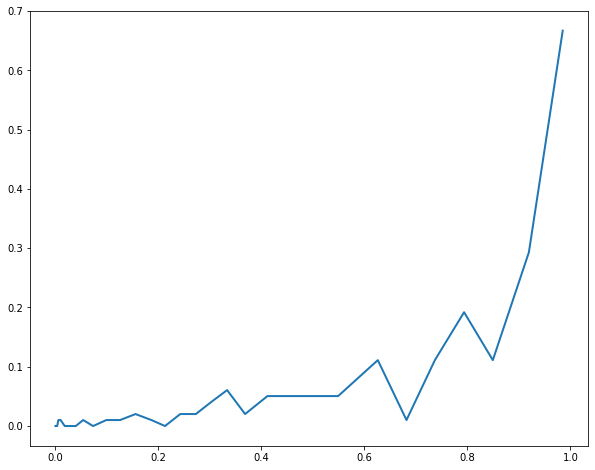

In [156]:
plt.close('all')
plt.figure(figsize=(10,8))
plt.plot(df.probabilty_predicted, df.probabilty_real,linewidth=2)

In [162]:
sum(df.isna().sum().values)

0